# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 

# Loading the dataset

In [3]:
audi_data=pd.read_csv("/content/audi.csv")

# Data Analysis

In [4]:
audi_data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [5]:
audi_data.shape

(10668, 9)

In [6]:
audi_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [7]:
audi_data.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,150,47.9,1.4


In [9]:
audi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [10]:
audi_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,10668.0,2017.100675,2.167494,1997.0,2016.00,2017.0,2019.0,2020.0
price,10668.0,22896.685039,11714.841888,1490.0,15130.75,20200.0,27990.0,145000.0
mileage,10668.0,24827.244001,23505.257205,1.0,5968.75,19000.0,36464.5,323000.0
tax,10668.0,126.011436,67.170294,0.0,125.00,145.0,145.0,580.0
mpg,10668.0,50.770022,12.949782,18.9,40.90,49.6,58.9,188.3
engineSize,10668.0,1.930709,0.602957,0.0,1.50,2.0,2.0,6.3


In [11]:
audi_data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Data Visualization

In [47]:
def plotss(a):
  plt.figure(figsize=(15,3),dpi=100)
  plt.title(a + "count")
  ax=sns.countplot(data=audi_data,x=a);
  for p in ax.patches: 
      ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
  plt.show()

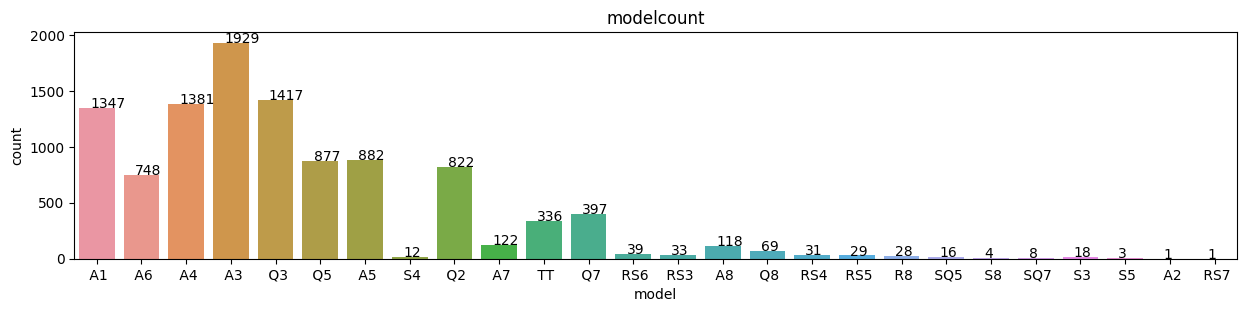

In [48]:
plotss("model")

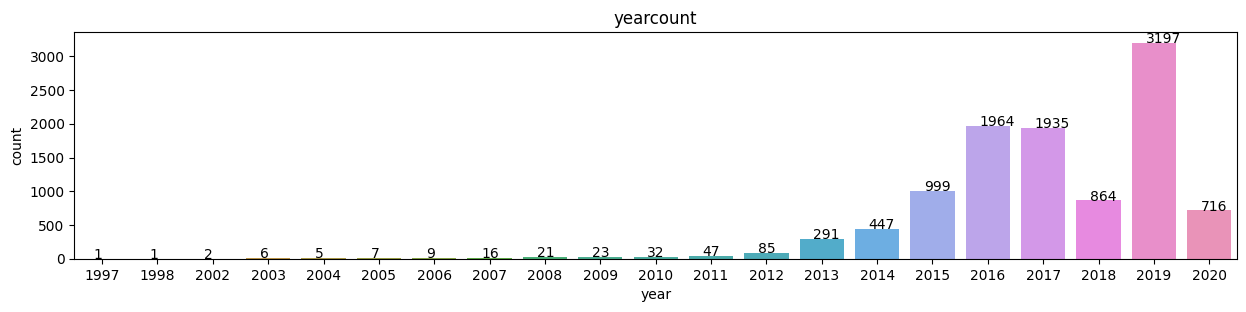

In [49]:
plotss("year")

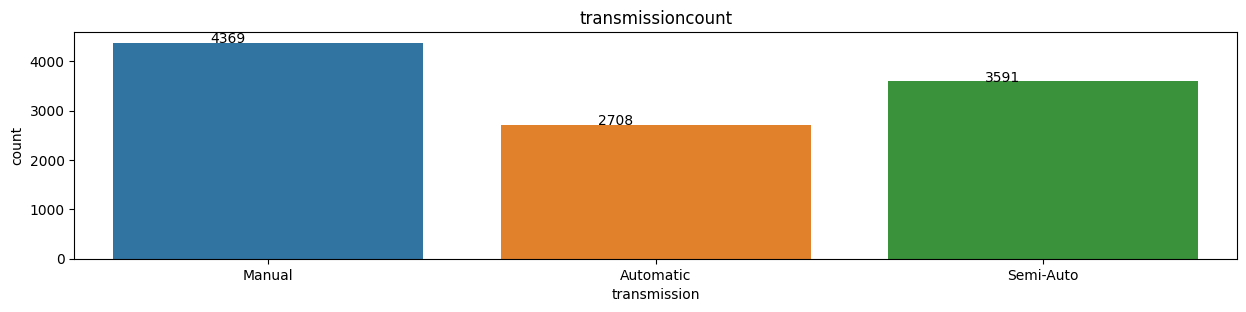

In [50]:
plotss("transmission")

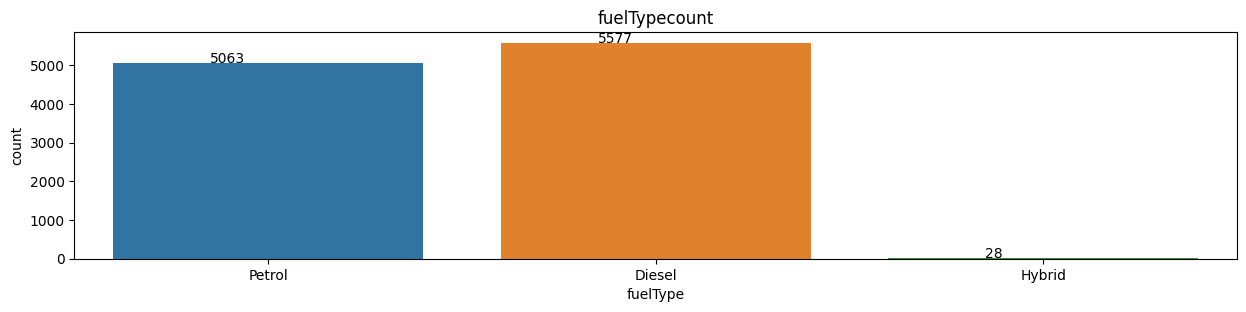

In [53]:
plotss("fuelType")

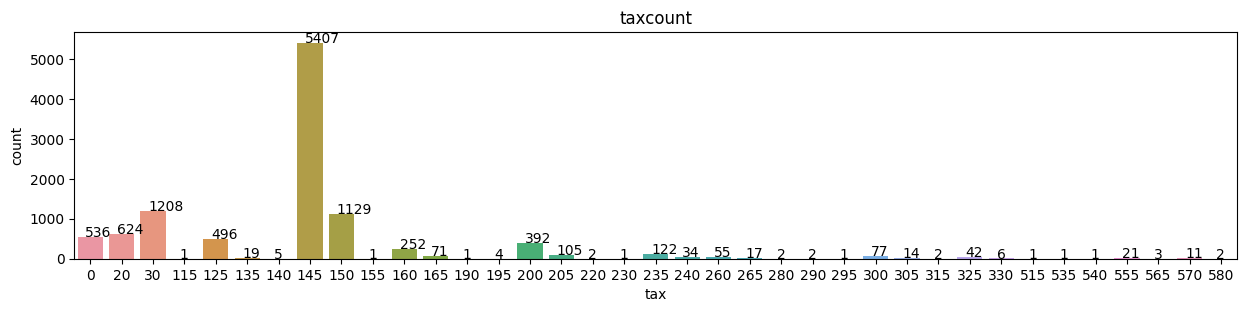

In [46]:
plotss("tax")

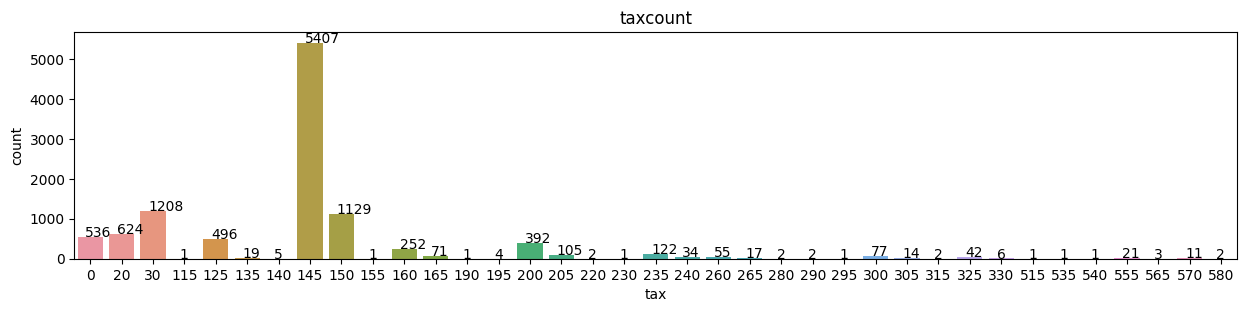

In [54]:
plotss("tax")

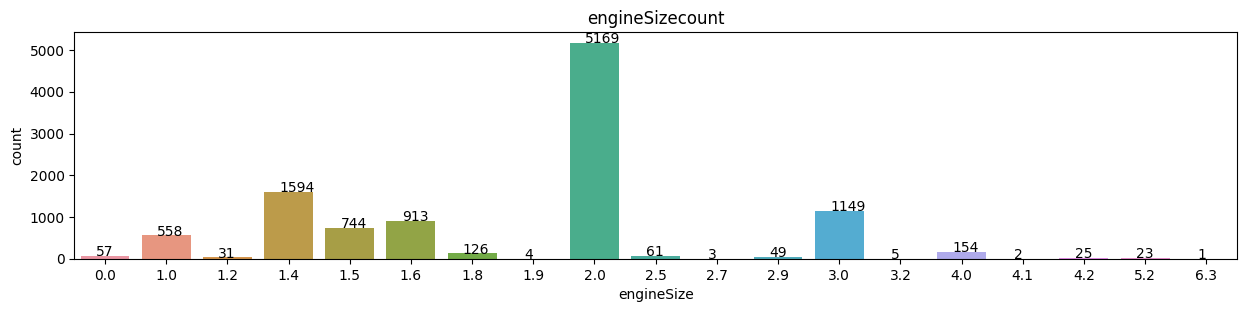

In [56]:
plotss("engineSize")

In [31]:
audi_data["mpg"].value_counts()

47.9    593
50.4    455
67.3    427
55.4    389
47.1    370
       ... 
19.6      1
22.6      1
24.8      1
19.3      1
44.5      1
Name: mpg, Length: 104, dtype: int64

In [33]:
audi_data["mileage"].value_counts()

5000     207
6000     195
1000     101
3000      99
4000      99
        ... 
26211      1
31605      1
17640      1
26111      1
8646       1
Name: mileage, Length: 7725, dtype: int64

# Bivariate Analysis

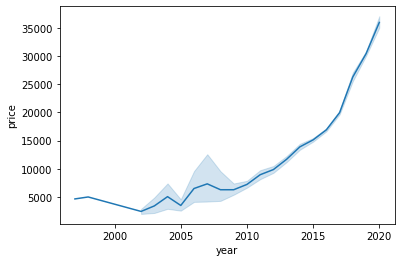

In [61]:
sns.lineplot(x="year",y="price",data=audi_data)

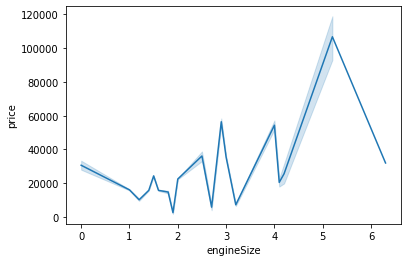

In [64]:
sns.lineplot(x="engineSize",y="price",data=audi_data)

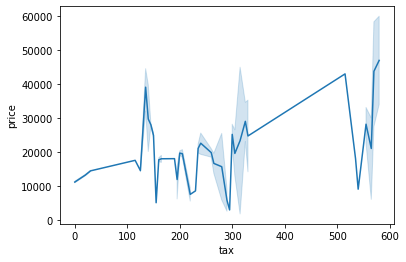

In [66]:
sns.lineplot(x="tax",y="price",data=audi_data)

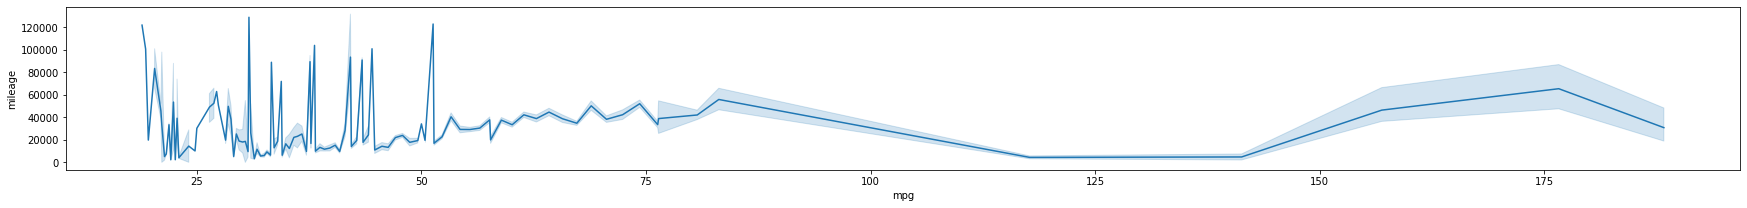

In [72]:
plt.figure(figsize=(30,3))
sns.lineplot(x="mpg",y="mileage",data=audi_data)
plt.show()

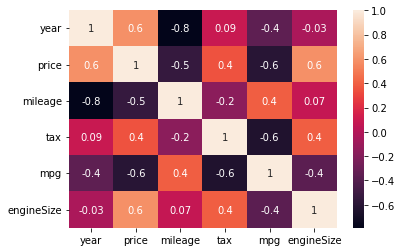

In [57]:
sns.heatmap(audi_data.corr(),fmt=".1g",annot=True)

# Data Preprocessing

Performing encoding

In [76]:
label_encoder=LabelEncoder()
audi_data["model"]=label_encoder.fit_transform(audi_data["model"])
audi_data["transmission"]=label_encoder.fit_transform(audi_data["transmission"])
audi_data["fuelType"]=label_encoder.fit_transform(audi_data["fuelType"])


In [77]:
audi_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0


**In model column number after encoding:-**

A1 = 0 , A6 = 5, A4 = 3, A3 = 2, Q3 = 9,Q5 = 10, A5 = 4 , S4 = 20, Q2 = 8, A7 = 6, TT = 25, Q7 = 11, RS6 = 17,RS3 = 14, A8 = 7 , Q8 = 12 ,RS4 = 15, RS5 = 16, R8 = 13, SQ5 = 23, S8 = 22, SQ7 = 24, S3 = 19, S5 = 21 ,A2 = 1 ,RS7 = 18


**In transmission column :- **

Manual == 1, Semi-Auto== 2 , Automatic transmission== 0

**In fuelType column:- **

Diesel == 0, Petrol== 2,Hybrid== 1



In [81]:
X = audi_data.iloc[:,[0,1,3,4,5,6,7,8]].values
Y = audi_data.iloc[:,[2]].values

In [82]:
X

array([[0.000e+00, 2.017e+03, 1.000e+00, ..., 1.500e+02, 5.540e+01,
        1.400e+00],
       [5.000e+00, 2.016e+03, 0.000e+00, ..., 2.000e+01, 6.420e+01,
        2.000e+00],
       [0.000e+00, 2.016e+03, 1.000e+00, ..., 3.000e+01, 5.540e+01,
        1.400e+00],
       ...,
       [2.000e+00, 2.020e+03, 1.000e+00, ..., 1.500e+02, 4.960e+01,
        1.000e+00],
       [9.000e+00, 2.017e+03, 0.000e+00, ..., 1.500e+02, 4.790e+01,
        1.400e+00],
       [9.000e+00, 2.016e+03, 1.000e+00, ..., 1.500e+02, 4.790e+01,
        1.400e+00]])

In [83]:
Y

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]])

# spillting the data

In [84]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)

# Training the model

In [85]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=0)

# Evaluating the model

In [86]:
y_pred = regression.predict(X_test)

In [88]:
mean_absolute_error(Y_test,y_pred)

1560.2109617717244

In [97]:
print("10% mean of traget variable:-" , (audi_data["price"].mean()*10)/100)

10% mean of traget variable:- 2289.6685039370077


It the average error in the between the test and predicted value

In [89]:
np.sqrt(mean_absolute_error(Y_test,y_pred))

39.49950584212066

As we can see that RMSE vakue is less that the 10% or target mean value that measn our model is predicting well.

In [90]:
print(y_pred)

[14296.   23043.15 27317.55 ... 46208.63 31396.2   9654.07]


In [91]:
y_pred = np.reshape(y_pred,(-1,1))

In [92]:
mydata = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(mydata,columns=['Real Price','Predicted Price'])

In [93]:
print(dataframe)

      Real Price  Predicted Price
0        14998.0         14296.00
1        21950.0         23043.15
2        28990.0         27317.55
3        25489.0         27128.72
4        30950.0         32347.55
...          ...              ...
2129     23700.0         39036.30
2130     18000.0         16674.19
2131     45995.0         46208.63
2132     30500.0         31396.20
2133      8400.0          9654.07

[2134 rows x 2 columns]
